In [3]:
import pandas as pd  
import numpy as np  

# Sample Data Creation  
data = {  
    "Sample ID": [f"Sample_{i+1}" for i in range(20)],  
    "Location": [  
        "Area_1", "Area_2", "Area_3", "Area_4", "Area_5",   
        "Area_1", "Area_2", "Area_3", "Area_4", "Area_5",  
        "Area_6", "Area_1", "Area_7", "Area_8", "Area_2",   
        "Area_3", "Area_4", "Area_5", "Area_6", "Area_9"  
    ],  
    "Soil pH": [  
        7.0, 6.5, np.nan, 8.0, 5.0,  
        7.2, 7.1, 6.9, 100.0, 4.5,   
        -1.0, 9.0, 7.6, 6.7, np.nan,   
        5.5, 7.8, 6.3, 7.1, 8.5  
    ],  
    "Moisture Content (%)": [  
        12.5, 14.3, 15.0, 10.0, -5.0,   
        130.0, 20.0, np.nan, 25.6, 30.1,   
        7.5, 8.0, 9.1, 11.2, "high",   
        8.5, 10.5, np.nan, 15.6, 20.0  
    ],  
    "Element Concentration": [  
        "Iron_1.5", "Magnesium_0.5", "Iron_2.1",   
        "Iron_1.8", "Magnesium_3.0", "Iron_1.0",  
        "Magnesium_2.5", "Iron_2.0", "Iron_2.5",   
        "Magnesium_2.8", "Iron_1.0", "Magnesium_0.99",  
        "Iron_1.3", np.nan, "Iron_2.2", "Magnesium_1A",  
        "Iron_2.1", "Iron_nan", "Iron_1.9", "Iron_3.7"  
    ]  
}  

# Create the DataFrame  
mars_df = pd.DataFrame(data)  

# Display the created dataset  
print(mars_df)

    Sample ID Location  Soil pH Moisture Content (%) Element Concentration
0    Sample_1   Area_1      7.0                 12.5              Iron_1.5
1    Sample_2   Area_2      6.5                 14.3         Magnesium_0.5
2    Sample_3   Area_3      NaN                 15.0              Iron_2.1
3    Sample_4   Area_4      8.0                 10.0              Iron_1.8
4    Sample_5   Area_5      5.0                 -5.0         Magnesium_3.0
5    Sample_6   Area_1      7.2                130.0              Iron_1.0
6    Sample_7   Area_2      7.1                 20.0         Magnesium_2.5
7    Sample_8   Area_3      6.9                  NaN              Iron_2.0
8    Sample_9   Area_4    100.0                 25.6              Iron_2.5
9   Sample_10   Area_5      4.5                 30.1         Magnesium_2.8
10  Sample_11   Area_6     -1.0                  7.5              Iron_1.0
11  Sample_12   Area_1      9.0                  8.0        Magnesium_0.99
12  Sample_13   Area_7   

In [4]:
# Step 1: Handle Missing Values  
mars_df['Location'].fillna(method='ffill', inplace=True)  
mars_df['Soil pH'].fillna(mars_df['Soil pH'].median(), inplace=True)  
mars_df['Moisture Content (%)'].replace("high", np.nan, inplace=True)  
mars_df['Moisture Content (%)'].fillna(mars_df['Moisture Content (%)'].mean(), inplace=True)  
mars_df['Moisture Content (%)'] = pd.to_numeric(mars_df['Moisture Content (%)'], errors='coerce')  
mars_df['Element Concentration'].fillna("unknown", inplace=True)  

# Step 2: Correct Data Types  
mars_df['Soil pH'] = pd.to_numeric(mars_df['Soil pH'], errors='coerce')  

# Step 3: Handle Outliers  
mars_df = mars_df[(mars_df['Soil pH'] >= 0) & (mars_df['Soil pH'] <= 14)]  
mars_df = mars_df[(mars_df['Moisture Content (%)'] >= 0) & (mars_df['Moisture Content (%)'] <= 100)]  

# Step 4: Standardize Formats  
mars_df['Element Concentration'] = mars_df['Element Concentration'].str.replace("_", " ").str.replace("nan", "unknown")  

# Step 5: Deduplicate  
mars_df.drop_duplicates(subset=['Sample ID'], keep='first', inplace=True)  

# Final cleaned dataset  
print(mars_df)

    Sample ID Location  Soil pH  Moisture Content (%) Element Concentration
0    Sample_1   Area_1     7.00             12.500000              Iron 1.5
1    Sample_2   Area_2     6.50             14.300000         Magnesium 0.5
2    Sample_3   Area_3     7.05             15.000000              Iron 2.1
3    Sample_4   Area_4     8.00             10.000000              Iron 1.8
6    Sample_7   Area_2     7.10             20.000000         Magnesium 2.5
7    Sample_8   Area_3     6.90             20.170588              Iron 2.0
9   Sample_10   Area_5     4.50             30.100000         Magnesium 2.8
11  Sample_12   Area_1     9.00              8.000000        Magnesium 0.99
12  Sample_13   Area_7     7.60              9.100000              Iron 1.3
13  Sample_14   Area_8     6.70             11.200000               unknown
14  Sample_15   Area_2     7.05             20.170588              Iron 2.2
15  Sample_16   Area_3     5.50              8.500000          Magnesium 1A
16  Sample_1

C:\Users\user\AppData\Local\Temp\ipykernel_10364\275274382.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mars_df['Location'].fillna(method='ffill', inplace=True)


In [5]:
# Step 1: Handle Missing Values  
mars_df['Location'].ffill(inplace=True)  # Forward fill for Location  
mars_df['Soil pH'].fillna(mars_df['Soil pH'].median(), inplace=True)  # Fill NaNs with median  
mars_df['Moisture Content (%)'].replace("high", np.nan, inplace=True)  # Replace "high" with NaN  
mars_df['Moisture Content (%)'].fillna(mars_df['Moisture Content (%)'].mean(), inplace=True)  # Fill NaNs with mean  
mars_df['Moisture Content (%)'] = pd.to_numeric(mars_df['Moisture Content (%)'], errors='coerce')  # Convert to numeric  
mars_df['Element Concentration'].fillna("unknown", inplace=True)  # Fill NaNs with "unknown"  

# Step 2: Correct Data Types  
mars_df['Soil pH'] = pd.to_numeric(mars_df['Soil pH'], errors='coerce')  

# Step 3: Handle Outliers  
mars_df = mars_df[(mars_df['Soil pH'] >= 0) & (mars_df['Soil pH'] <= 14)]  
mars_df = mars_df[(mars_df['Moisture Content (%)'] >= 0) & (mars_df['Moisture Content (%)'] <= 100)]  

# Step 4: Standardize Formats  
mars_df['Element Concentration'] = mars_df['Element Concentration'].str.replace("_", " ").str.replace("nan", "unknown")  

# Step 5: Deduplicate  
mars_df.drop_duplicates(subset=['Sample ID'], keep='first', inplace=True)  

# Final cleaned dataset  
print(mars_df)  

    Sample ID Location  Soil pH  Moisture Content (%) Element Concentration
0    Sample_1   Area_1     7.00             12.500000              Iron 1.5
1    Sample_2   Area_2     6.50             14.300000         Magnesium 0.5
2    Sample_3   Area_3     7.05             15.000000              Iron 2.1
3    Sample_4   Area_4     8.00             10.000000              Iron 1.8
6    Sample_7   Area_2     7.10             20.000000         Magnesium 2.5
7    Sample_8   Area_3     6.90             20.170588              Iron 2.0
9   Sample_10   Area_5     4.50             30.100000         Magnesium 2.8
11  Sample_12   Area_1     9.00              8.000000        Magnesium 0.99
12  Sample_13   Area_7     7.60              9.100000              Iron 1.3
13  Sample_14   Area_8     6.70             11.200000               unknown
14  Sample_15   Area_2     7.05             20.170588              Iron 2.2
15  Sample_16   Area_3     5.50              8.500000          Magnesium 1A
16  Sample_1

In [11]:
print(mars_df.tail())

    Sample ID Location  Soil pH  Moisture Content (%) Element Concentration
15  Sample_16   Area_3      5.5              8.500000          Magnesium 1A
16  Sample_17   Area_4      7.8             10.500000              Iron 2.1
17  Sample_18   Area_5      6.3             20.170588          Iron unknown
18  Sample_19   Area_6      7.1             15.600000              Iron 1.9
19  Sample_20   Area_9      8.5             20.000000              Iron 3.7


In [6]:
# Descriptive statistics  
print(mars_df.describe(include='all'))

       Sample ID Location    Soil pH  Moisture Content (%)  \
count         16       16  16.000000             16.000000   
unique        16        9        NaN                   NaN   
top     Sample_1   Area_2        NaN                   NaN   
freq           1        3        NaN                   NaN   
mean         NaN      NaN   7.037500             15.331985   
std          NaN      NaN   1.082974              6.051454   
min          NaN      NaN   4.500000              8.000000   
25%          NaN      NaN   6.650000             10.375000   
50%          NaN      NaN   7.050000             14.650000   
75%          NaN      NaN   7.650000             20.042647   
max          NaN      NaN   9.000000             30.100000   

       Element Concentration  
count                     16  
unique                    15  
top                 Iron 2.1  
freq                       2  
mean                     NaN  
std                      NaN  
min                      NaN  
25%    

Check for Unique Locations
We can see how many unique sampling locations are present in the dataset:

In [7]:
# Unique Locations  
unique_locations = mars_df['Location'].unique()  
num_unique_locations = mars_df['Location'].nunique()  
print(f"Unique Locations ({num_unique_locations}): {unique_locations}")

Unique Locations (9): ['Area_1' 'Area_2' 'Area_3' 'Area_4' 'Area_5' 'Area_7' 'Area_8' 'Area_6'
 'Area_9']


Soil pH Analysis
Let's check the distribution of soil pH values, including the mean, median, and range:

In [8]:
# Soil pH Analysis  
soil_pH_mean = mars_df['Soil pH'].mean()  
soil_pH_median = mars_df['Soil pH'].median()  
soil_pH_min = mars_df['Soil pH'].min()  
soil_pH_max = mars_df['Soil pH'].max()  

print(f"Mean Soil pH: {soil_pH_mean:.2f}")  
print(f"Median Soil pH: {soil_pH_median:.2f}")  
print(f"Minimum Soil pH: {soil_pH_min:.2f}")  
print(f"Maximum Soil pH: {soil_pH_max:.2f}")

Mean Soil pH: 7.04
Median Soil pH: 7.05
Minimum Soil pH: 4.50
Maximum Soil pH: 9.00


Moisture Content Analysis
Let's analyze the moisture content, identifying its average and distribution:

In [9]:
# Moisture Content Analysis  
moisture_mean = mars_df['Moisture Content (%)'].mean()  
moisture_std = mars_df['Moisture Content (%)'].std()  

print(f"Mean Moisture Content: {moisture_mean:.2f}%")  
print(f"Standard Deviation: {moisture_std:.2f}%")

Mean Moisture Content: 15.33%
Standard Deviation: 6.05%


In [12]:
# Element Concentration Analysis  
unique_elements = mars_df['Element Concentration'].unique()  
print(f"Unique Element Concentrations: {unique_elements}")

Unique Element Concentrations: ['Iron 1.5' 'Magnesium 0.5' 'Iron 2.1' 'Iron 1.8' 'Magnesium 2.5'
 'Iron 2.0' 'Magnesium 2.8' 'Magnesium 0.99' 'Iron 1.3' 'unknown'
 'Iron 2.2' 'Magnesium 1A' 'Iron unknown' 'Iron 1.9' 'Iron 3.7']


Visualization
For better insights, we can visualize some of the aspects discussed above. Here are a few plots we can create using matplotlib or seaborn.

A. Histogram of Soil pH:

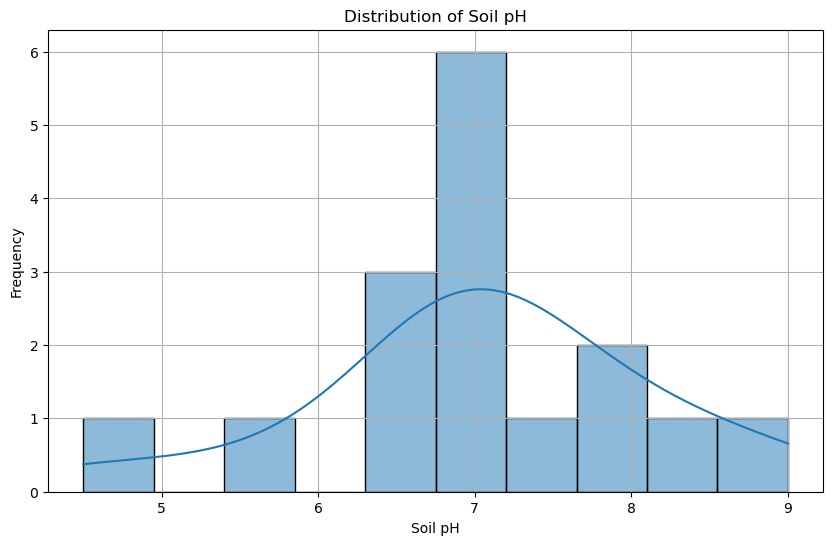

In [13]:
import matplotlib.pyplot as plt  
import seaborn as sns  

plt.figure(figsize=(10, 6))  
sns.histplot(mars_df['Soil pH'].dropna(), bins=10, kde=True)  
plt.title('Distribution of Soil pH')  
plt.xlabel('Soil pH')  
plt.ylabel('Frequency')  
plt.grid()  
plt.show()

B. Bar Chart of Average Moisture Content per Location:
python

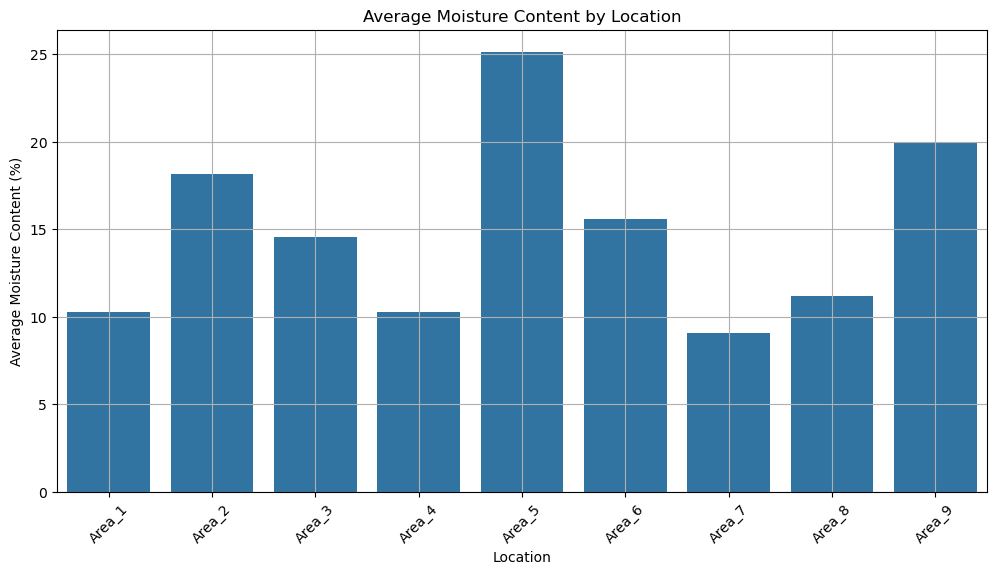

In [14]:
avg_moisture_by_location = mars_df.groupby('Location')['Moisture Content (%)'].mean().reset_index()  

plt.figure(figsize=(12, 6))  
sns.barplot(x='Location', y='Moisture Content (%)', data=avg_moisture_by_location)  
plt.title('Average Moisture Content by Location')  
plt.xlabel('Location')  
plt.ylabel('Average Moisture Content (%)')  
plt.xticks(rotation=45)  
plt.grid()  
plt.show()

Correlation Analysis
We could examine potential correlations between soil pH and moisture content.

In [15]:
# Correlation between Soil pH and Moisture Content  
correlation = mars_df[['Soil pH', 'Moisture Content (%)']].corr()  
print("Correlation Matrix:\n", correlation)

Correlation Matrix:
                       Soil pH  Moisture Content (%)
Soil pH               1.00000              -0.49507
Moisture Content (%) -0.49507               1.00000
